In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np




# visualize 
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 
import scipy.stats as stats

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt







from sympy import *



from sympy.matrices import Matrix
from sympy.interactive.printing import init_printing





In [2]:


def one_tail_hypthonesis(p,alpha): 
    p=p
    alpha=alpha
    if p < alpha:
        x=('We can reject the null hypothesis')
    else:
        x=("We fail to reject the null hypothesis")

    # x.replace(' ','~')

    # x=display(symbols(x))
    # x.replace('~',' ')
    return x


def two_tail_hyp_test(p,t,alpha):
    if (t > 0) and ((p/2) < alpha):
        x=('We can reject our null hypothesis')
    else:
        x=('We fail to reject our null hypothesis')
    # x.replace(' ','~')

    # x=display(symbols(x))
    # x.replace('~',' ')
    return x



def seaborndist(df,h=7,subplotlen=1,subplotwid=2):
    w=h*(subplotwid+.75)
    dfa=df.select_dtypes(include='number')

    fig, ax = plt.subplots(subplotlen,subplotwid, figsize=(w, h)) 
    # you can change the distribution,
    fig.subplots_adjust(hspace = .5, wspace=.5, )
    
    ax = ax.ravel()
    
    for i in range(len(dfa.columns)):
        ax[i] = dfa.iloc[:,i].plot(kind='hist', ax=ax[i])
        ax[i] = dfa.iloc[:,i].plot(kind='kde', ax=ax[i], secondary_y=True)
        plt.title(dfa.columns[i])

def pd_DF_one_shot_info(df,log_bool=True):
    oneshot=pd.concat(
        [df.head(3).rename(index={0:' head_1', 1:'head_2',2:'head_3'}),
        pd.DataFrame(df.dtypes,columns=['dtypes']).T,
        df.describe(include='all')],axis=0)
    uniquevales=df.nunique().sort_values()
    plot_u=uniquevales.plot.bar(logy=log_bool,figsize=(15,5),title='Unique values per column',rot=90,grid=True)
    plot_kde=df.plot.kde(figsize=(15,5),title='Distributions per column',rot=90,grid=True)
    seaborn_kde=seaborndist(df)


    # pie=df.plot.pie(y=df.isna(),figsize=(15,10),title='Unique values per column')
    x=datadict(df)

# Plot information with y-axis in log-scale
        
    display(oneshot,df.shape,plot_u,x,seaborn_kde) 
           
    return x




def datadict(df):
    x=(pd.concat([df.dtypes,df.nunique(),df.count(),df.isnull().sum(),df[df.isnull()==0].kurtosis()],axis=1))
    type(x)
    x=x.reset_index()
    collist=x.columns.to_list()
    columns=['name','data type','unique','total count','null count','non null kurt']
    coldict=dict(zip(collist,columns))
    x.rename(columns=coldict,inplace=True)
    x.sort_values(by=['unique','total count','name'],inplace=True)
    x=x.reset_index(drop=True)
    x['percent null']=(x['null count']/ x['total count'])*100
    
   
    return x




def singledatetimecol(df,dtcol,format='%Y-%m-%d'):
    df[dtcol]=pd.to_datetime(df[dtcol],format=format)
    dfdatetime=df[dtcol]


   

    day=dfdatetime.dt.day_of_week
    week=dfdatetime.dt.isocalendar().week 
    month=dfdatetime.dt.month
    year=dfdatetime.dt.year
    quarter=dfdatetime.dt.quarter

    
    df['century']=year//100*100
    df['decade']=year//10*10
    df['year']=year
    df['week_in_year']=week
    df['quarter']=quarter  
    df['month']=month
   
    df['day']=day 
    
    df=df.set_index(dtcol)


    cols=df.columns.to_list()
    org=df.columns.to_list()
    cols=[x.lower() for x in cols]
    mapper=dict(zip(org,cols))
    mapper
    df=df.rename(axis='columns',mapper=mapper)
    # cols=df.colums.to_list()
    # cols=[x.lower() for x in cols]
    


    

  




    # weeksbin=dfdatetime.dt.to_period(freq='W')
    # monthsbin=dfdatetime.dt.to_period(freq='b')
    # quarterbin=dfdatetime.dt.to_period(freq='b')

    return df


def dateTimeintervals(df):
    # df=df.reset_index()
   
    # dfdatetime=df[dtcol]


    # datmax=dfdatetime.max()
    # datmin=dfdatetime.min()

    # intervalsformonthbins=pd.interval_range(start=datmin, end=datmax, periods=None, freq='M', name='months_bins', closed='right')
    # intervalsforyearbins=pd.interval_range(start=datmin, end=datmax, periods=None, freq='Y', name='years_bins', closed='right')
    # intervalsforweekbins=pd.interval_range(start=datmin, end=datmax, periods=None, freq='7D', name='week_bins', closed='right')
    # intervelsforquarters=pd.interval_range(start=datmin, end=datmax, periods=None, freq='3M', name='quarter_bins', closed='right')
    # intervalsforthreedaybins=pd.interval_range(start=datmin, end=datmax, periods=None, freq='3D', name='three_day_bins', closed='right')

    df['months_bins']=df.index.to_period('M')
    df['week_bins']=df.index.to_period('W')
    df['years_bins']=df.index.to_period('Y')
    df['day_bins']=df.index.to_period('D')
    df['three_day_bins']=df.index.to_period('3D')
    df['quarter_bins']=df.index.to_period('Q')
    df['bimonthly_bins']=df.index.to_period('2W')
    # df['three_day_bins']=dfdatetime.to_period('3D')




    # df['years_bins']=dfdatetime.map(intervalsforyearbins)
    # df['week_bins']=dfdatetime.map(intervalsforweekbins)
    # df['quarter_bins']=dfdatetime.map(intervelsforquarters)
    # df['three_day_bins']=dfdatetime.map(intervalsforthreedaybins)
    # df=df.set_index(dtcol)

    return df








def datetimegroupby(df,dtcol,targetcol):
    decade_day=df.groupby(['decade','day'])
    decade_week=df.groupby(['decade','week_in_year'])
    decade_month=df.groupby(['decade','month'])
    decade_quart=df.groupby(['decade','quarter'])


    year_day=df.groupby(['year','day'])
    year_week=df.groupby(['year','week_in_year'])
    year_month=df.groupby(['year','month'])
    year_quart=df.groupby(['year','quarter'])


    groups=[decade_day,decade_week,decade_month,decade_quart,year_day,year_week,year_month,year_quart]
    groupnames=['decade_day','decade_week','decade_month','decade_quart','year_day','year_week','year_month','year_quart']
    groupdict=dict(zip(groupnames,groups))




    df=df.reset_index()


    for i in groupnames:
        g=groupdict.get(i)    

        tomerge=pd.DataFrame(g.averagetemperature.mean()).reset_index()

    
        newcol=f'average_{i}'
        mapper={targetcol:newcol}

        tomerge=tomerge.rename(columns=mapper)
        leftcols=set(df.columns)
        to_merge=list(leftcols.intersection(set(tomerge.columns)))
        df=pd.merge(left=df,right=tomerge,how='left',on=to_merge)


    df=df.set_index('dt')
    return df


def resampleexample(df,y):


    y=df[y]


    quartercent=y.resample(pd.Timedelta('25Y'))
    decades=y.resample(pd.Timedelta('10Y'))
    years=y.resample(pd.Timedelta('1Y'))
    halfyears=y.resample(pd.Timedelta('0.5Y'))
    quarteryears=y.resample(pd.Timedelta('0.25Y'))
    months=y.resample('M')
    #### needs to fill from here we choose nearest to fill
    ### other methods could be interpolate 
    # I found it to be interesting that it castes it to a series when you use nearest, bfill, interpolate etc
    # We needed to resample it after using our nearest
    biweekly=y.resample('2W')
    weekly=y.resample('W')
    threeday=y.resample('3d')


    biweekly=biweekly.nearest()
    weekly=weekly.nearest()
    threeday=threeday.nearest()

    biweekly=biweekly.resample('2W')
    weekly=weekly.resample('W')
    threeday=threeday.resample('3d')

    display(
    len(quartercent),
    len(decades),
    len(years),
    len(halfyears),
    len(quarteryears),
    len(months),
    len(biweekly),
    len(weekly),
    len(threeday),
        )
    resamples=[quartercent,decades,years,halfyears,quarteryears,months,biweekly,weekly,threeday]
    resamplenames=['quartercent','decades','years','halfyears','quarteryears','months','biweekly','weekly','threeday']
    resampledict=dict(zip(resamplenames,resamples))

    for i in resamplenames:
        y=resampledict.get(i)
        plt.figure(figsize=(15,10))
        plt.plot(y.mean())
        plt.title(i)
        plt.show()

        

In [3]:
def train_val_test_time(df):
    '''


    Basic train,val,test for time related things.

    






    '''
    lenth_df=len(df)


    train_size=int(lenth_df//2)
    val_size=int(lenth_df//(10/3))
    test_size=lenth_df-(train_size+val_size)

    display(train_size/lenth_df,val_size/lenth_df,test_size/lenth_df)
    validate_end_index = train_size + val_size


    # here I reverse the order intentially so that the majority of my data is the most recent.
    # I reverse it again in each partition 

    df=df.sort_index(ascending=False)

    train = df[:train_size]

    validate = df[train_size:validate_end_index]
    test = df[validate_end_index:]






    train=train.sort_index()
    validate=validate.sort_index()

    test=test.sort_index()
    return train,validate,test




def evaluate(target_var,train,validate):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse










def plot_and_eval(target_var,train,validate):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()




def plot_and_eval(target_var,train,validate):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()    



# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)




# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])



def yhat_df(df,target):
    yhat_df = pd.DataFrame(
    {target: df["target"]},
    index=df.index)
    return yhat_df




In [4]:
##aquire and prep
df = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [5]:
df.head()
df.City.nunique()
# We are tasked with exploring a small geographical area.
# I will see if the City of Tampa Florida has a large enough data set. 



3448

In [6]:
tampa=df[df.City=='Tampa']


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
7415413,1743-11-01,18.664,2.349,Tampa,United States,28.13N,82.73W
7415414,1743-12-01,NaN,NaN,Tampa,United States,28.13N,82.73W
7415415,1744-01-01,NaN,NaN,Tampa,United States,28.13N,82.73W
dtypes,object,float64,float64,object,object,object,object
count,3239,3093.0,3093.0,3239,3239,3239,3239
unique,3239,NaN,NaN,1,1,1,1
top,1743-11-01,NaN,NaN,Tampa,United States,28.13N,82.73W
freq,1,NaN,NaN,3239,3239,3239,3239
mean,NaN,21.925673,1.334783,NaN,NaN,NaN,NaN
std,NaN,4.46392,1.299528,NaN,NaN,NaN,NaN


(3239, 7)

<AxesSubplot:title={'center':'Unique values per column'}>

,name,data type,unique,total count,null count,non null kurt,percent null
0,City,object,1,3239,0,NaN,0.000000
1,Country,object,1,3239,0,NaN,0.000000
2,Latitude,object,1,3239,0,NaN,0.000000
3,Longitude,object,1,3239,0,NaN,0.000000
4,AverageTemperatureUncertainty,float64,1738,3093,146,1.389542,4.720336
5,AverageTemperature,float64,2802,3093,146,-1.214683,4.720336
6,dt,object,3239,3239,0,NaN,0.000000


None

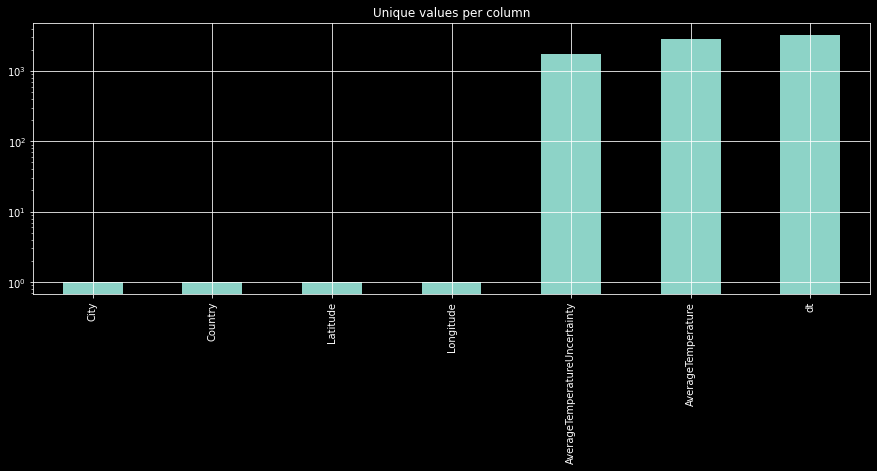

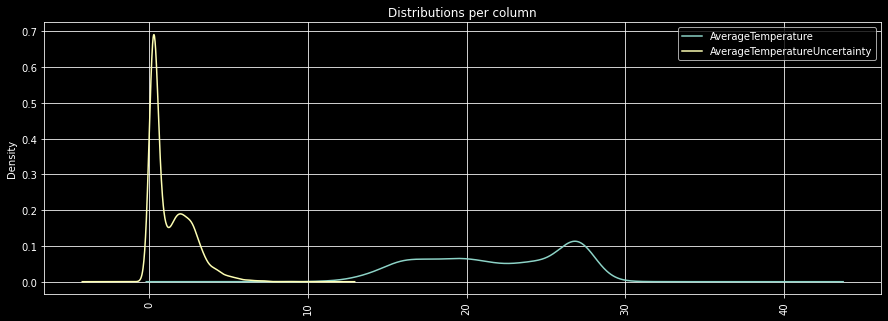

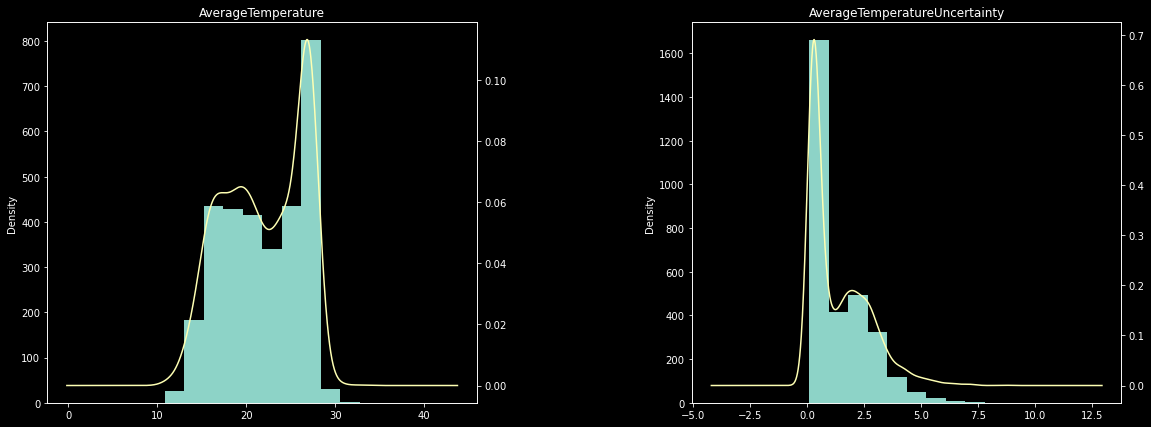

In [7]:
datadict=pd_DF_one_shot_info(tampa,log_bool=True)



## Data Dictionary


|    | name                          | data type   |   unique |   total count |   null count |   non null kurt |   percent null |
|---:|:------------------------------|:------------|---------:|--------------:|-------------:|----------------:|---------------:|
|  0 | City                          | object      |        1 |          3239 |            0 |       nan       |        0       |
|  1 | Country                       | object      |        1 |          3239 |            0 |       nan       |        0       |
|  2 | Latitude                      | object      |        1 |          3239 |            0 |       nan       |        0       |
|  3 | Longitude                     | object      |        1 |          3239 |            0 |       nan       |        0       |
|  4 | AverageTemperatureUncertainty | float64     |     1738 |          3093 |          146 |         1.38954 |        4.72034 |
|  5 | AverageTemperature            | float64     |     2802 |          3093 |          146 |        -1.21468 |        4.72034 |
|  6 | dt                            | object      |     3239 |          3239 |            0 |       nan       |        0       |

In [8]:
# We see that we have only 4.720% null. For this initial approach they should be safe to drop due to the law of large numbers.
tampa=tampa.dropna()
# Also since we are focused on Tampa all the City, Country, Lat, Long are the same. we will drop them all
tampa=tampa.drop(columns=['City',	'Country'	,'Latitude'	,'Longitude'])






In [9]:
tampa=singledatetimecol(tampa,'dt')


In [10]:
tampa.dtypes

averagetemperature               float64
averagetemperatureuncertainty    float64
century                            int64
decade                             int64
year                               int64
week_in_year                      UInt32
quarter                            int64
month                              int64
day                                int64
dtype: object

In [11]:
### so here I will split into train, val, test

# note we have to make a trade off here in biasing our data. For the sake of contiunity. We are splinting based on the datetime index
# however depending on how consisent our rates of change are from one century to the next our test will be biased towards the old data
# with this MVP I will simply split in a reversed chronological order. # Future options would be to do our train, val, test split
#in normal chronological order
# A more complex apporaoch would be to split ensureing equal membership from each year and so on
# This wouild require more thought on sampling as we would likely need to consider sampling in a way that optimized the intervals of missing data
# These intervals would be respective to each partition's relative size. 



## TLDR we picked a simple partition for the sake of time. Partitions that are assuming "all else equal" would need significant amount more care to create.

In [12]:



train,validate,test=train_val_test_time(tampa)


0.4998383446492079

0.2997090203685742

0.2004526349822179

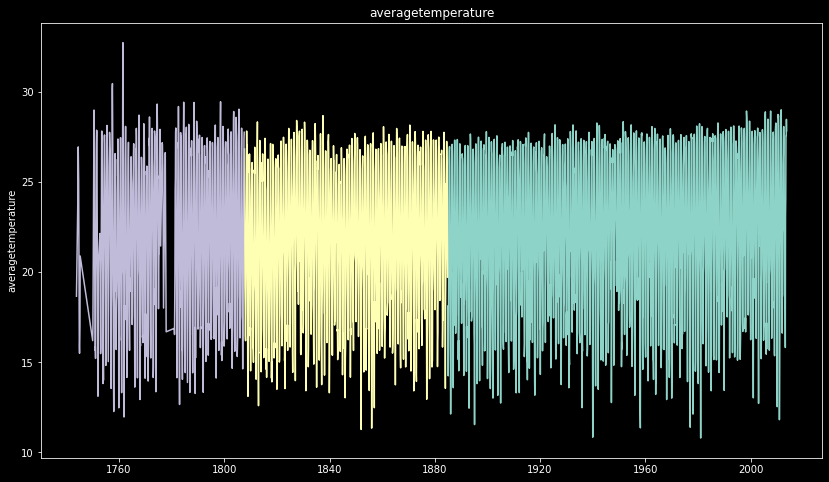

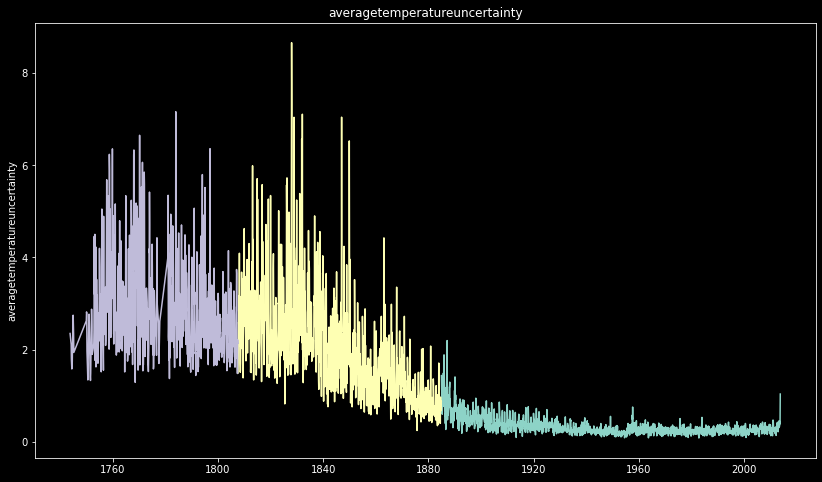

In [13]:
for col in ['averagetemperature','averagetemperatureuncertainty']:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()





In [14]:
#note we see that the uncertainy changes drastically across the time periods, yet that is dependent on the scale and it is a small 
# 
# 
#  If it were not for timeframe of delivery I would go back

# and partition by dates that are more uniform.


# We will see how this presents in our modeling. As the c



In [15]:
celscale=range(0,10,1)
farscale=[]
#We also put this is F for the sake of comparison by those who grew up in the US.
[farscale.append((x*9/5)+32) for x in celscale]
farscale


[32.0, 33.8, 35.6, 37.4, 39.2, 41.0, 42.8, 44.6, 46.4, 48.2]

In [16]:
trainaveinfar=((train.averagetemperature.mean())*(9/5))+32
trainaveinfar



# Since uncertainty is a range we should subtract the start point from each.

farscaleadjusted=[f'[{ trainaveinfar +(x-32):.2f},  { trainaveinfar -(x-32):.2f}]' for x in farscale]
farscaleadjusted



['[71.81,  71.81]',
 '[73.61,  70.01]',
 '[75.41,  68.21]',
 '[77.21,  66.41]',
 '[79.01,  64.61]',
 '[80.81,  62.81]',
 '[82.61,  61.01]',
 '[84.41,  59.21]',
 '[86.21,  57.41]',
 '[88.01,  55.61]']

In [17]:
train=dateTimeintervals(train)
train=datetimegroupby(train,dtcol='dt',targetcol='averagetemperature')


validate=dateTimeintervals(validate)
validate=datetimegroupby(validate,dtcol='dt',targetcol='averagetemperature')


test=dateTimeintervals(test)
test=datetimegroupby(test,dtcol='dt',targetcol='averagetemperature')



In [18]:


train.head()


,averagetemperature,averagetemperatureuncertainty,century,decade,year,week_in_year,quarter,month,day,months_bins,...,quarter_bins,bimonthly_bins,average_decade_day,average_decade_week,average_decade_month,average_decade_quart,average_year_day,average_year_week,average_year_month,average_year_quart
dt,,,,,,,,,,,,,,,,,,,,,
1884-12-01,18.116,1.435,1800,1880,1884,49,4,12,0,1884-12,...,1884Q4,1884-12-01/1884-12-07,21.305222,16.2040,16.308333,19.035438,18.116,18.116,18.116,18.116000
1885-01-01,16.134,1.146,1800,1880,1885,1,1,1,3,1885-01,...,1885Q1,1884-12-29/1885-01-04,21.103000,16.1720,15.020400,16.004400,18.524,16.134,16.134,15.459667
1885-02-01,14.244,1.065,1800,1880,1885,5,1,2,6,1885-02,...,1885Q1,1885-01-26/1885-02-01,21.058400,16.0688,16.068800,16.004400,16.112,14.244,14.244,15.459667
1885-03-01,16.001,0.657,1800,1880,1885,9,1,3,6,1885-03,...,1885Q1,1885-02-23/1885-03-01,21.058400,16.9240,16.924000,16.004400,16.112,16.001,16.001,15.459667
1885-04-01,20.959,0.597,1800,1880,1885,14,2,4,2,1885-04,...,1885Q2,1885-03-30/1885-04-05,22.914375,20.6010,20.848000,23.578467,23.839,20.959,20.959,23.548000


In [19]:
y='averagetemperature'


In [20]:
train.nunique().sort_values()

century                             3
quarter                             4
day                                 7
month                              12
decade                             14
week_in_year                       24
average_decade_quart               56
average_decade_day                 98
years_bins                        130
year                              130
average_decade_month              167
average_decade_week               311
average_year_quart                514
quarter_bins                      516
averagetemperatureuncertainty     520
average_year_day                  888
average_year_month               1475
average_year_week                1475
averagetemperature               1475
three_day_bins                   1546
bimonthly_bins                   1546
week_bins                        1546
months_bins                      1546
day_bins                         1546
dtype: int64

In [21]:
#stats
#is our data monotonic?

alpha=.05
#the null is that there is not an association 

t,p=stats.kendalltau(train['averagetemperature'],train.index.to_list())


two_tail_hyp_test(p,t,alpha)



'We can reject our null hypothesis'

In [22]:

t,p=stats.kendalltau(train['averagetemperature'],train.index.to_list())


two_tail_hyp_test(p,t,alpha)













'We can reject our null hypothesis'

##  Modeling


Here things started breaking and I did not have time to troubleshoot.

In [26]:
def make_predictions(meantemp=None):
    yhat_df = pd.DataFrame({'meantemp': [meantemp]},
                          index=validate.index)
    return yhat_df



periods = [1, 2, 3, 4, 10,30,int(365/4),int(365/2),365,365*2]

for p in periods: 
    meantemp = round(train['averagetemperature'].rolling(p).mean()[-1], 2)
    yhat_df = make_predictions(meantemp)
    model_type = str(p) + '_moving_avg'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col,train=train,validate=validate)


TypeError: evaluate() missing 2 required positional arguments: 'train' and 'validate'

In [ ]:
import statsmodels.api as sm

col = 'averagetemperature' 





In [ ]:
# print(col, '\n')
# sm.tsa.seasonal_decompose(train[col].resample('W').mean()).plot()
# plt.show()


In [ ]:
print(col, '\n')
sm.tsa.seasonal_decompose(train[col].resample('M').mean()).plot()
plt.show()


In [ ]:

print(col, '\n')
sm.tsa.seasonal_decompose(train[col].resample('Q').mean()).plot()
plt.show()


In [ ]:
print(col, '\n')
sm.tsa.seasonal_decompose(train[col].resample('Y').mean()).plot()
plt.show()




In [ ]:

# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)


# fit the holt's object
model = model.fit(optimized=True)



In [ ]:


yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])




In [ ]:


yhat_items                            




In [ ]:
plot_and_eval(target_var = col,train=train,validate=validate)



eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = col)

eval_df.sort_values(by='rmse')

## Conclusion


I need to revisit and spend more time on timeseries. If I were to do it again, I would pick a larger area so I could exlude some of the datetimes in this range. Picking the correct stats tests for ordinal information was interesting as well. In short there is a lot I would do differently.


